In [219]:
import pyarabic.araby as araby
import pyarabic.number as number
from pyarabic.number import vocalize_number

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize


import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt

In [220]:
quran = pd.read_csv('quran_with_tashkel.csv',  header=None)
quran.rename(columns={0: 'Verses'}, inplace=True)
quran.head(10)

,Verses
0,بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ
1,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,الرَّحْمَنِ الرَّحِيمِ
3,مَالِكِ يَوْمِ الدِّينِ
4,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
5,اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ
6,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ...
7,بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ الم
8,ذَلِكَ الْكِتَابُ لَا رَيْبَ فِيهِ هُدًى لِلْم...
9,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ...


In [221]:
"""
* Make all verses in a list "all_verses"  =>  ['بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ']
* tokenize each sentence to get a list of tokenizations "list_of_tokenizes" =>['بِسْمِ', 'اللَّهِ', 'الرَّحْمَنِ', 'الرَّحِيمِ']
* make a list of words from all tokenizations
"""

all_verses = quran['Verses']
list_of_all_words = []

for verse in all_verses:
    list_of_tokenizes = araby.tokenize(verse) # word_tokenize the same
    for word in list_of_tokenizes:
        list_of_all_words.append(word)
                
len(list_of_all_words) # 78245 word in whole Quran

78245

In [222]:
"""
* make a word frequent and sorted them as a top 5000 descending order 
"""
word_freq = FreqDist(list_of_all_words)
sorted_freq_dist = sorted(word_freq, key= word_freq.__getitem__ , reverse= True)
sorted_freq_dist = sorted_freq_dist[:5000]
sorted_freq_dist

['مِنْ',
 'فِي',
 'مَا',
 'اللَّهِ',
 'لَا',
 'الَّذِينَ',
 'اللَّهُ',
 'مِنَ',
 'عَلَى',
 'إِلَّا',
 'وَلَا',
 'وَمَا',
 'إِنَّ',
 'اللَّهَ',
 'أَنْ',
 'قَالَ',
 'إِلَى',
 'مَنْ',
 'يَا',
 'إِنْ',
 'ثُمَّ',
 'بِهِ',
 'لَهُمْ',
 'كَانَ',
 'بِمَا',
 'لَكُمْ',
 'ذَلِكَ',
 'لَهُ',
 'الَّذِي',
 'هُوَ',
 'أَوْ',
 'قُلْ',
 'آمَنُوا',
 'قَالُوا',
 'فِيهَا',
 'وَاللَّهُ',
 'وَمَنْ',
 'كَانُوا',
 'الْأَرْضِ',
 'إِذَا',
 'هَذَا',
 'كَفَرُوا',
 'كُنْتُمْ',
 'عَلَيْهِمْ',
 'هُمْ',
 'شَيْءٍ',
 'السَّمَاوَاتِ',
 'وَهُوَ',
 'وَإِنْ',
 'وَالَّذِينَ',
 'لَمْ',
 'إِنَّا',
 'فَلَا',
 'إِذْ',
 'عَنْ',
 'أَيُّهَا',
 'إِنَّهُ',
 'عَلَيْكُمْ',
 'عَلَيْهِ',
 'مِنْهُمْ',
 'حَتَّى',
 'بِاللَّهِ',
 'وَهُمْ',
 'الرَّحْمَنِ',
 'أُولَئِكَ',
 'يَوْمَ',
 'إِنِّي',
 'وَإِذَا',
 'مُوسَى',
 'فِيهِ',
 'وَلَقَدْ',
 'كُلِّ',
 'قَدْ',
 'الرَّحِيمِ',
 'لِلَّهِ',
 'رَبِّكَ',
 'بِسْمِ',
 'الدُّنْيَا',
 'إِنَّمَا',
 'بَلْ',
 'مِمَّا',
 'أَمْ',
 'وَلَوْ',
 'وَالْأَرْضِ',
 'يَشَاءُ',
 'مِنْكُمْ',
 'رَبِّ',
 'فَلَمَّا',
 'عَلِيمٌ'

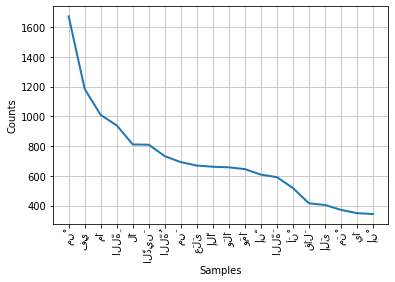

In [223]:
"""
* top 20 word most frequent
"""
word_freq.plot(20)


In [224]:
"""
* make a list of frequent numbers and showing each word and number of occurrences 
* make a Pandas Data Frame 

"""
num_of_freq = []
for word in sorted_freq_dist:
    num_of_freq.append(word_freq[word])

    
df_top_5000_quranWords = pd.DataFrame({'Quran_Words': sorted_freq_dist, 'Number_of_occurrences': num_of_freq})
df_top_5000_quranWords.head()

,Quran_Words,Number_of_occurrences
0,مِنْ,1673
1,فِي,1185
2,مَا,1010
3,اللَّهِ,940
4,لَا,812


In [225]:
df_top_5000_quranWords.shape

(5000, 2)

In [226]:
"""
* saving it as an Excel and CSV files
"""
df_top_5000_quranWords.to_csv('mostFrequent_5000_quranWords.csv')
df_top_5000_quranWords.to_excel('mostFrequent_5000_quranWords.xlsx')

In [227]:
"""
* make an word cloud image "image contain most frequent words without tashkeel 
"""
arabic_10 = sorted_freq_dist[:200] # 200 word
list_for_wordcloud = " ".join(araby.strip_tashkeel(word) for word in arabic_10 ) 
print(list_for_wordcloud)

من في ما الله لا الذين الله من على إلا ولا وما إن الله أن قال إلى من يا إن ثم به لهم كان بما لكم ذلك له الذي هو أو قل آمنوا قالوا فيها والله ومن كانوا الأرض إذا هذا كفروا كنتم عليهم هم شيء السماوات وهو وإن والذين لم إنا فلا إذ عن أيها إنه عليكم عليه منهم حتى بالله وهم الرحمن أولئك يوم إني وإذا موسى فيه ولقد كل قد الرحيم لله ربك بسم الدنيا إنما بل مما أم ولو والأرض يشاء منكم رب فلما عليم أن عند الناس ربي فإن منه يؤمنون فما منها فإذا وقال وكان دون لنا كذلك تعملون بعد يعلمون السماء وإن ربهم هم للذين بها ألم الكتاب خير أنتم المؤمنين عذاب شيئا الكتاب لو إليه إليك بالحق ربنا سبيل فإن قبل النار بين القيامة عن وإذ لك فمن عنهم هل نحن الظالمين ومن يومئذ كنا إنهم كيف يعلم العالمين وقالوا كما لعلكم الصالحات لن رحيم لي خلق مع قوم ولكن التي بآياتنا جاء شاء يعملون عليك تعلمون أعلم أنت قليلا ربك الآخرة لمن ألا بينهم بعد جهنم وعملوا ولكن الكافرين لقد علينا يقولون للناس لقوم غفور فقد جميعا إنك أنا كل تجري الحق الناس فرعون لهم أرسلنا الصلاة أنزل كل هي عما


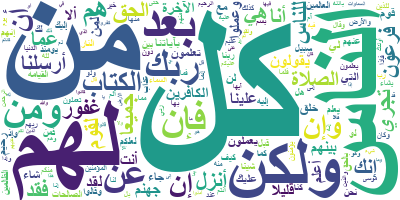

In [233]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
from wordcloud import WordCloud

text = list_for_wordcloud 
reshaped_text = arabic_reshaper.reshape(text)
artext = get_display(reshaped_text)


# wordcloud = WordCloud().generate(artext)
wordcloud = WordCloud(background_color="white", font_path="arial-bold.ttf").generate(artext) #  arial-bold.ttf is a font 

wordcloud.to_image()
